#### 1. Import required libraries

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2.  Read the train dataset

In [2]:
train = pd.read_csv('02._train.csv')

#### 3. Display the top 5 rows of train dataset

In [3]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


### 4. Exploratory Data Analysis

EDA helps us to understand the data better. We will check if the data is containing NULLS or not, what is the data type of the columns, checking for stats, distribution, outliers, etc.

#### 4.1. Checking the data types and if columns are containing nulls or not

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


<hr>

<b>Observations: -</b> 

From the above cell, we can see that : - 
1. Number of Observation in train set: 6650
2. Number of Observation in test set: 2851
3. None of the columns in train and test datasets are containing NULLS

#### 4.2. Understanding the statistics of the train datasets

In [5]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


<hr>
<b>Observations: -</b>
    
    1. There are total 10 features in our datasets. 10 independant features and 1 dependant feature.
    2. 6 features in our train datasets are of Numerical data type(integer), while other 5 are of object data type.

#### 4.3. Looking at the object and numerical data types

In [6]:
train.select_dtypes('O').head()

,ID,Gender,Income,Product_Holdings,Credit_Category
0,84e2fcc9,Female,5L - 10L,1,Average
1,57fea15e,Female,Less than 5L,1,Poor
2,8df34ef3,Female,More than 15L,2,Poor
3,c5c0788b,Female,More than 15L,2,Poor
4,951d69c4,Female,More than 15L,1,Good


In [7]:
train.select_dtypes('int64').head()

,Age,Vintage,Transaction_Status,Credit_Card,Is_Churn
0,36,4,0,0,1
1,53,2,1,1,0
2,35,2,1,0,0
3,43,0,1,1,1
4,39,1,1,1,1


#### 4.4. Checking the unique values in the object data type features

In [8]:
def get_unique_vals(df, name):
    """
    This function prints the unique values in all the columns having object datatypes of the dataset.
    Parameters:    
    1. df: DataFrame
    2. name: String value which is used to identify the name of the dataframe
    
    Returns: None
    """
    cols = [col for col in df.select_dtypes('O').columns]
    for col in cols:
        if col == 'ID':
            continue
        print(f'Unique values in column: {col} in {name} dataset are:' + str(df[col].unique()))

In [9]:
get_unique_vals(df= train, name='train')

Unique values in column: Gender in train dataset are:['Female' 'Male']
Unique values in column: Income in train dataset are:['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
Unique values in column: Product_Holdings in train dataset are:['1' '2' '3+']
Unique values in column: Credit_Category in train dataset are:['Average' 'Poor' 'Good']


<hr>
<b>Observations: -</b>

    1. Gender contains: Male, Female.
    2. Income contains: 5L - 10L, Less than 5L, More than 15L, 10L - 15L
    3. Product_Holdings contains: 1, 2, 3+
    4. Credit_Category contains: Average, Poor, Good

#### 4.5. Understand the portion of customers churned or retained

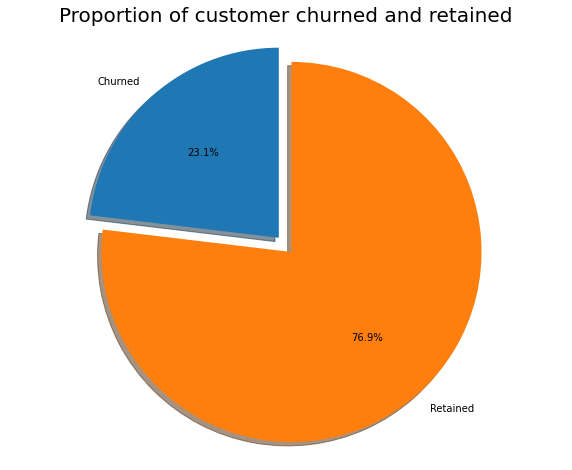

In [10]:
labels = 'Churned', 'Retained'
sizes = [train.Is_Churn[train['Is_Churn']==1].count(), train.Is_Churn[train['Is_Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<hr>

<b>Observation: -</b>
    
So approximate 23% of the customers have churned. So the baseline model could be to predict that approx 23% of the customers will churn. Given approx 23% is a small number, we need to ensure that the chosen model does predict with great accuracy.

#### 4.6. Understanding the relations between the categorical features

<AxesSubplot:xlabel='Product_Holdings', ylabel='count'>

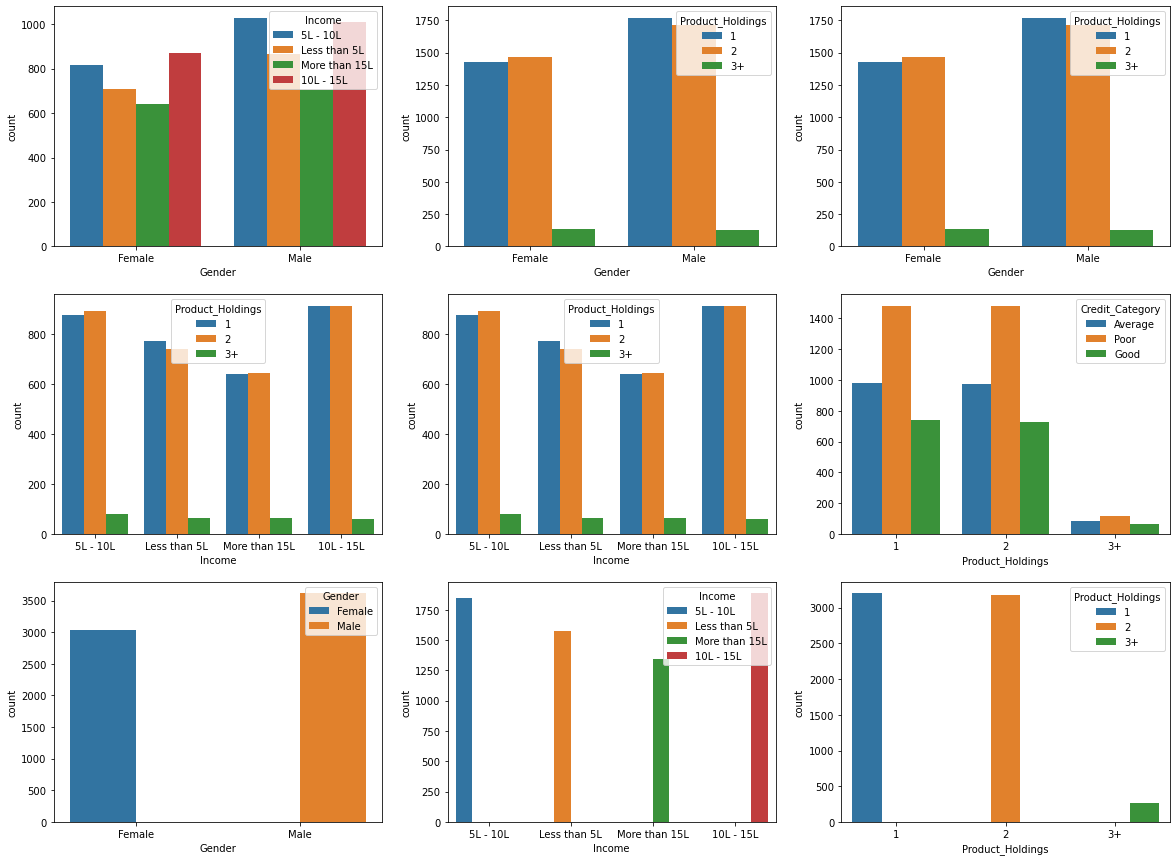

In [11]:
fig, axarr = plt.subplots(3, 3, figsize=(20, 15))

sns.countplot(x='Gender', hue = 'Income',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Product_Holdings',data = train, ax=axarr[0][1])
sns.countplot(x='Gender', hue = 'Product_Holdings',data = train, ax=axarr[0][2])

sns.countplot(x='Income', hue = 'Product_Holdings',data = train, ax=axarr[1][0])
sns.countplot(x='Income', hue = 'Product_Holdings',data = train, ax=axarr[1][1])
sns.countplot(x='Product_Holdings', hue = 'Credit_Category',data = train, ax=axarr[1][2])


sns.countplot(x='Gender', hue = 'Gender',data = train, ax=axarr[2][0])
sns.countplot(x='Income', hue = 'Income',data = train, ax=axarr[2][1])
sns.countplot(x='Product_Holdings', hue = 'Product_Holdings',data = train, ax=axarr[2][2])

<hr>
<b> Observation: -</b> 

    1. Credit_Category: for most of the observations in our train dataset is Poor.
    2. Income: For most of the observations in our train dataset is between 5-10L & 10L-15L.
    3. Product_Holdings: for most of the observations hold 2 products.

#### 4.7. Understanding the relations between the dependant and independant feature

<AxesSubplot:xlabel='Vintage', ylabel='count'>

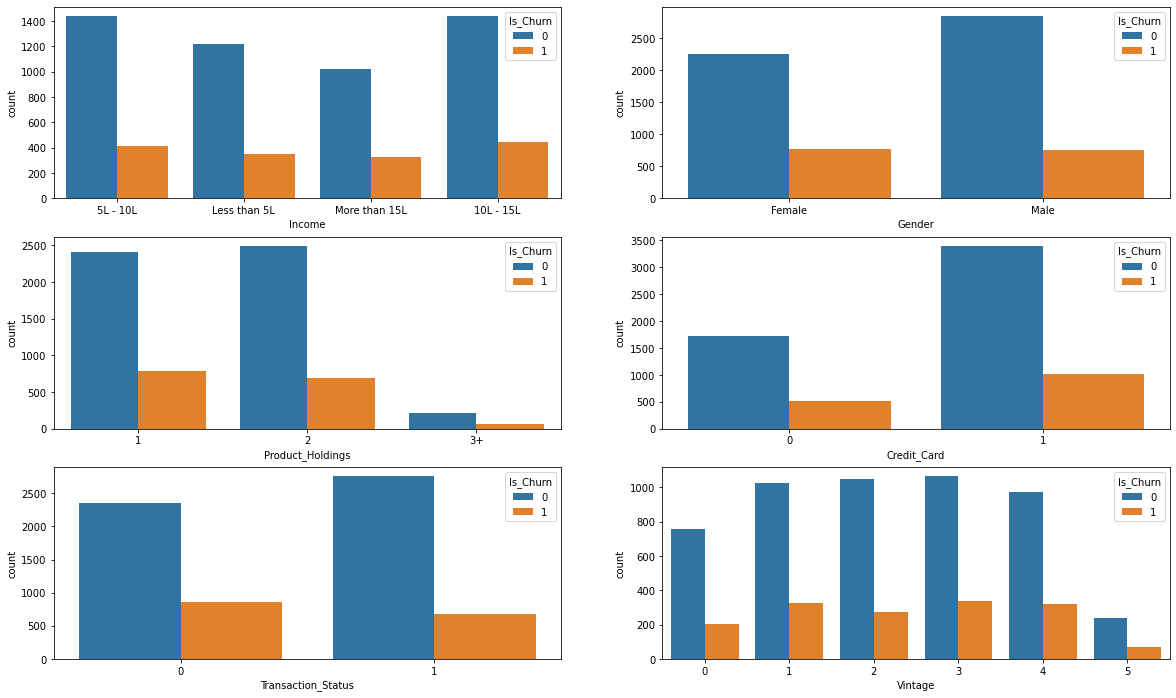

In [12]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Income', hue = 'Is_Churn',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Is_Churn',data = train, ax=axarr[0][1])
sns.countplot(x='Product_Holdings', hue = 'Is_Churn',data = train, ax=axarr[1][0])
sns.countplot(x='Credit_Card', hue = 'Is_Churn',data = train, ax=axarr[1][1])
sns.countplot(x='Transaction_Status', hue = 'Is_Churn',data = train, ax=axarr[2][0])
sns.countplot(x='Vintage', hue = 'Is_Churn',data = train, ax=axarr[2][1])

<AxesSubplot:xlabel='Is_Churn', ylabel='Age'>

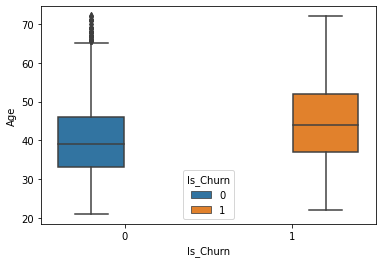

In [13]:
sns.boxplot(y='Age',x = 'Is_Churn', hue = 'Is_Churn',data = train)

#### 4.8. Correlation plot

<AxesSubplot:>

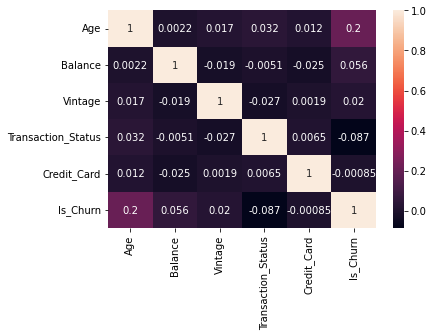

In [14]:
sns.heatmap(train.corr(), annot=True)

<b> Observation: -</b>

    1. None of the columns are having high positive correlation betwen them.
    2. Credit card and Transacitonal status are having negative correlation with the dependent variable (Is_Churn).

<hr>

### 5. Feature Engineering

Manchine Learning model dont understand the categorical data, the data should always be in the numerical format. So, we will perform some feature engineering on the data

#### 5.1. Perform train test split before performing feature engineering.

We have to perform train test split on the train dataset, to prevent the data leakage and avoid overfitting of the machine learning model.

In [15]:
train_df = train.sample(frac=0.8, random_state= 94)
validate_df = train.drop(train_df.index)

In [16]:
train_df.shape, validate_df.shape

((5320, 11), (1330, 11))

#### 5.2. Drop ID column as we dont need ID column to be fed as an input to our machine learning model.

In [17]:
train_df.drop(columns=['ID'], inplace=True)
validate_df.drop(columns=['ID'], inplace=True)

#### 5.3. List all columns with categorical variable and perform encoding

In [19]:
train_df.select_dtypes('O').head()

,Gender,Income,Product_Holdings,Credit_Category
5725,Male,10L - 15L,2,Average
5369,Female,10L - 15L,1,Good
2655,Male,More than 15L,1,Average
2649,Male,More than 15L,1,Good
2062,Female,5L - 10L,1,Average


#### 5.3.a. Convert Product_Holdings

As we have seen that the column Product_Holdings contains only numbers, so we will just convert its data type to integer in both train and test datasets.

In [20]:
train_df['Product_Holdings'] = train_df['Product_Holdings'].str.replace('+', '', regex=True)
validate_df['Product_Holdings'] = validate_df['Product_Holdings'].str.replace('+', '', regex=True)
train_df['Product_Holdings'] = train_df['Product_Holdings'].astype(int)
validate_df['Product_Holdings'] = validate_df['Product_Holdings'].astype(int)

In [21]:
train_df.select_dtypes('O').head()

,Gender,Income,Credit_Category
5725,Male,10L - 15L,Average
5369,Female,10L - 15L,Good
2655,Male,More than 15L,Average
2649,Male,More than 15L,Good
2062,Female,5L - 10L,Average


#### 5.3.b. Perform one-hot encoding on Gender column

Since Gender feature is nominal (having no relationship within the category), so we will perform one hot encoding on this column. We will perform drop_first= True because we can derive the outcome of the column from the last one.

In [27]:
train_gender = pd.get_dummies(train_df['Gender'], drop_first= True)

In [28]:
train_df = pd.concat([train_df, train_gender], axis=1)

In [32]:
train_df.drop(columns=['Gender'], inplace= True)

In [33]:
train_df.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Male
5725,31,10L - 15L,1595556.63,5,0,2,1,Average,1,1
5369,59,10L - 15L,1247257.89,4,1,1,0,Good,1,0
2655,41,More than 15L,977622.12,2,0,1,1,Average,1,1
2649,43,More than 15L,1811800.26,0,0,1,1,Good,0,1
2062,44,5L - 10L,470702.07,2,1,1,1,Average,0,0


In [34]:
validate_gender = pd.get_dummies(validate_df['Gender'], drop_first= True)

In [35]:
validate_df = pd.concat([validate_df, validate_gender], axis=1)

In [36]:
validate_df.drop(columns=['Gender'], inplace= True)

In [37]:
validate_df.head()

,Age,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Male
11,33,10L - 15L,1229087.79,3,1,2,1,Poor,0,0
13,32,More than 15L,189726.03,3,1,1,1,Good,0,1
14,33,10L - 15L,1626138.18,4,0,1,1,Poor,0,1
19,45,10L - 15L,30347.82,2,1,1,1,Poor,0,0
21,41,10L - 15L,1072086.66,4,1,2,1,Poor,1,1


<b>5.3.cb. Perform Label encoding for the ordinal columns </b>

We will perform label encoding for Income and Creditm_Category columns as they are ordinal column.

In [41]:
train_df.Income.unique()

array(['10L - 15L', 'More than 15L', '5L - 10L', 'Less than 5L'],
      dtype=object)

In [42]:
income_map = {'Less than 5L': 0, 
             '5L - 10L':1, 
             '10L - 15L':2, 
              'More than 15L':3
             }

In [44]:
train_df.replace({'Income': income_map}, inplace=True)
validate_df.replace({'Income': income_map}, inplace=True)

In [46]:
train_df.Credit_Category.unique()

array(['Average', 'Good', 'Poor'], dtype=object)

In [47]:
category_map = {'Poor': 0,
               'Average':1, 
               'Good':2}

In [48]:
train_df.replace({'Credit_Category': category_map}, inplace=True)
validate_df.replace({'Credit_Category': category_map}, inplace=True)

<b> 5.3.d. Perform min max scaling on Balance and Age column

In [54]:
scaler = MinMaxScaler()
train_df[['Age', 'Balance']] = scaler.fit_transform(train_df[['Age', 'Balance']])
validate_df[['Age', 'Balance']] = scaler.fit_transform(validate_df[['Age', 'Balance']])

### 6. Split the dependant and independant variable to feed input to the model

In [72]:
train_df = train_df[['Age', 'Income','Balance', 'Vintage', 'Transaction_Status','Product_Holdings', 'Credit_Card', 'Credit_Category','Male', 'Is_Churn']]
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

In [73]:
validate_df = validate_df[['Age', 'Income','Balance', 'Vintage', 'Transaction_Status','Product_Holdings', 'Credit_Card', 'Credit_Category','Male', 'Is_Churn']]
X_val = validate_df.iloc[:, :-1]
y_val = validate_df.iloc[:, -1]

### 6. Model development and training

In this project, we will create 3 models and compare them based on F1-score metrics and see which model is the best out of the 3 models. The models that we will train are as below: -

1. Logistic Regression
2. Decision Tree Classifier.
3. XGB Classifier.

In [75]:
clf = LogisticRegression(random_state=94).fit(X_train, y_train)

In [76]:
y_pred= clf.predict(X_val)

In [80]:
f1_score(y_val, y_pred)

0.08187134502923976

<hr>

<b>Observation: -</b> 
    
Logisitc Regression has 81.9% as F1-score.

<hr>

### Next steps: 
1. Create other 2 machine learning model and compare the performance of the models.
2. Finlaise on model out of 3.
3. Use the final model to predict on the test dataset.